# Support Vector Machines

## Support Vector Classifier

- one of the most recently developed
- hyperplane is a flat affine subspace of dimension n - 1
- 1d is a point
- 2d is a line
- 3d is a plane

- the aim is to create a seperated hyperplane to be able to classify points.
- with data that is not perfectly sperated we accept some level of missclassification
- the difference between a threshold and observation is a soft margin
- soft margin allows for missclassification to add more bias to the model.

## Support Vector Machines

- kernels allow the use of soft margins for when there are no clear classifications
- we can do a kernel projection to add a new dimension to the data wherein a curve is mapped, we can then use the line on this curve to classify. (147)
- kernel tricks avoids recomputing higher dimensions. (uses something called dot products) (147)
- dot product: sum of subcomponents (a.b = a1b1 + a2b2 OR a.b = |a||b|cos(theta) (148)
- the use of kernels can be thought of as a measure of similarity between the original feature space and the enlarged feature space (the thrown cloth thing he spoke about)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')

In [3]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


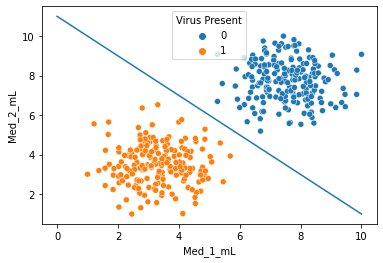

In [8]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df)

# Define the hyperplane now...
x = np.linspace(0, 10, 100)
m = -1 # slope of -1
b = 11

y = m*x + b

plt.plot(x, y)

In [6]:
from sklearn.svm import SVC # Support vector classifier

In [13]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [9]:
y = df['Virus Present']
X = df.drop('Virus Present', axis=1)

In [15]:
# rbf = radial basis function, gamma = 
model = SVC(kernel='linear', C=1000)

In [16]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [5]:
from svm_margin_plot import plot_svm_boundary

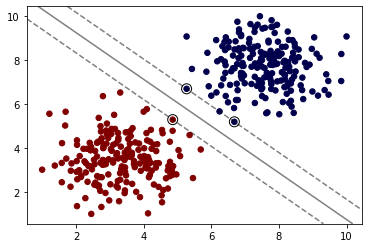

In [18]:
# Nice!
plot_svm_boundary(model, X, y)

In [19]:
model = SVC(kernel='linear', C=0.5)
model.fit(X, y)

SVC(C=0.5, kernel='linear')

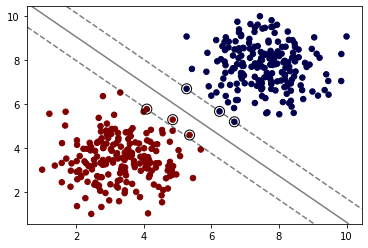

In [20]:
plot_svm_boundary(model, X, y)

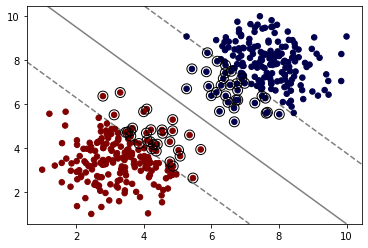

In [23]:
# as C gets closer to 0 we allow more and more points to go within the margin
model = SVC(kernel='linear', C=0.005)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [24]:
# rbf
model = SVC(kernel='rbf', C=1) # default kernel, lower the C the more we accept in the margin

model.fit(X, y)

SVC(C=1)

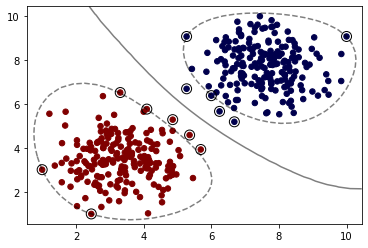

In [26]:
# Projected to a higher dimensional space
# margins surrounding the clusters
plot_svm_boundary(model, X, y)

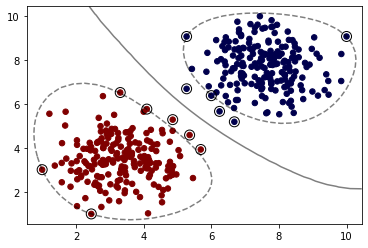

In [28]:
# rbf
model = SVC(kernel='rbf', C=1, gamma='scale') # defaults..
model.fit(X, y)
plot_svm_boundary(model, X, y)

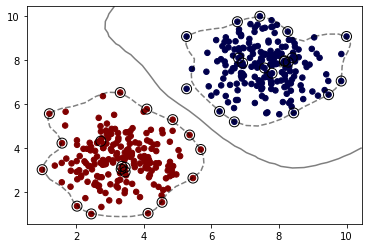

In [29]:
# rbf
model = SVC(kernel='rbf', C=1, gamma='auto') # defaults..
model.fit(X, y)
plot_svm_boundary(model, X, y)

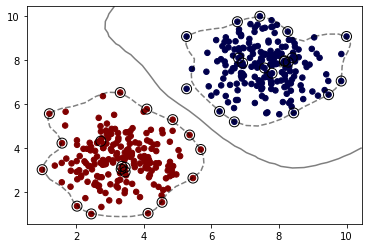

In [30]:
# rbf
model = SVC(kernel='rbf', C=1, gamma=0.5) # defaults..
model.fit(X, y)
plot_svm_boundary(model, X, y)

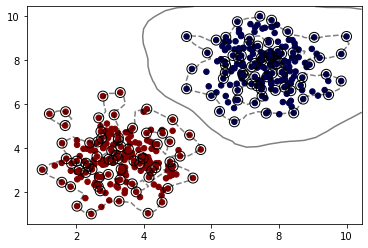

In [10]:
# rbf
# start off playing with rbf and C and gamma
model = SVC(kernel='rbf', C=1, gamma=2) # defaults..
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [5]:
# Higher the gamma the more noise gets picked up.

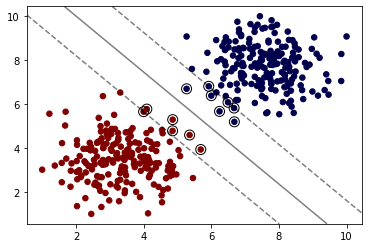

In [14]:
model = SVC(kernel='poly', C=1, degree=1.5) # Polynomial kernel
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [15]:
# Grid search for support vector machine
from sklearn.model_selection import GridSearchCV

In [16]:
svm = SVC()
param_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

In [17]:
grid = GridSearchCV(svm, param_grid)

In [18]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [20]:
# Check the best params...
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}